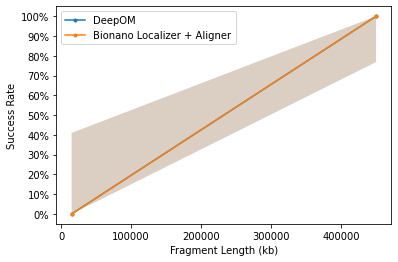

In [1]:
from deepom.bionano_compare import *
from deepom.bionano_utils import *

report_a = BionanoCompareReport()
# report_a.run_name = "20221014T092718Z"
report_a.run_name = "20221021T231508Z"
report_a.read_compute_results()
report_a.plot_compare()

In [2]:
report_a.bionano_accuracy

len_bp
15000.0     0.0
450000.0    1.0
Name: correct, dtype: float64

In [3]:
report_a.aligner_accuracy

len_bp
15000.0     0.0
450000.0    1.0
Name: correct, dtype: float64

In [ ]:
from deepom.bionano_compare import *

report_b = BionanoCompareReport()
report_b.run_name = "20221011T134448Z"
report_b.read_compute_results()
report_b.plot_compare()

In [ ]:
from pathlib import Path
from matplotlib import ticker
from matplotlib.ticker import MultipleLocator

_, axs = pyplot.subplots(figsize=(10, 4), dpi=200, ncols=2)

title_kw = dict(loc="left", y=1.1, pad=-10, fontdict={"color": "k"})
pyplot.sca(axs[0])
pyplot.title("a.", **title_kw)
report_a.plot_compare()


def set_fig_params():
    pyplot.xscale("log")
    ax = pyplot.gca()
    ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, y: int(x // 1000)))
    ax.xaxis.set_minor_locator(MultipleLocator(10000))
    ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
    pyplot.grid(which="both")


set_fig_params()
pyplot.legend(
    pyplot.gca().lines,
    ["DeepOM", "Bionano Localizer + DeepOM Aligner"],
    fontsize=8,
)
pyplot.xticks(numpy.stack([20, 50, 100, 200, 400]) * 1000)
pyplot.sca(axs[1])

pyplot.title("b.", **title_kw)
report_b.plot_compare()
set_fig_params()

pyplot.legend(
    pyplot.gca().lines,
    ["DeepOM", "Bionano Localizer + Aligner"],
    fontsize=8,
)
pyplot.xticks(numpy.stack([20, 50, 100, 200]) * 1000)
pyplot.tight_layout()
for ext in [".pdf"]:
    pyplot.savefig(Path("../../DeepOM-Paper/figures") / ("benchmark_figure" + ext), bbox_inches='tight')